In [1]:
##############################################################################################################
# DESCRIPTION: 
#              
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/"

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 200 # 600 #10000
hyperparams.BATCH_SIZE = 16
hyperparams.START_NEURONS = 8 # UNET
hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0010_1000"
SAVED_MODEL = "0010_1000-64-unet-n2"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', SAVED_MODEL))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0299
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.4778

#from tensorflow.keras.optimizers import Adam
#hyperparams.OPTIMIZER = Adam(learning_rate=0.0001)
#from tensorflow.keras.optimizers import Nadam
#hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)
from tensorflow.keras.optimizers import RMSprop
hyperparams.OPTIMIZER = RMSprop(learning_rate = 0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelC as train
import ReportsK as reports
import UnetI as model_factory

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5509488611394645282
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5722079232
locality {
  bus_id: 1
  links {
  }
}
incarnation: 462849524315101799
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
]
Tensorflow version: 2.6.0
Keras Version: 2.6.0
GPU is available


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
##################
# MODEL DEFINITION
##################

model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Loss=mean_absolute_error
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 8)    80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 8)    584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 8)    0           conv2d_1[0][0]                   
_____________________________________________________________________

{'name': 'RMSprop',
 'learning_rate': 0.0001,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

In [6]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/
Noisy files:20592
Nitid files:20592
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/validation/
Noisy files:5000
Nitid files:5000


In [7]:
##################
# TRAIN MODEL
##################
hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 150 )

Epoch 1/200
1287/1287 [==============================] - 35s 21ms/step - loss: 0.0797 - val_loss: 0.0564
Epoch 2/200
1287/1287 [==============================] - 27s 21ms/step - loss: 0.0644 - val_loss: 0.0539
Epoch 3/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0624 - val_loss: 0.0584
Epoch 4/200
1287/1287 [==============================] - 26s 21ms/step - loss: 0.0606 - val_loss: 0.0526
Epoch 5/200
1287/1287 [==============================] - 27s 21ms/step - loss: 0.0594 - val_loss: 0.0542
Epoch 6/200
1287/1287 [==============================] - 26s 21ms/step - loss: 0.0584 - val_loss: 0.0528
Epoch 7/200
1287/1287 [==============================] - 27s 21ms/step - loss: 0.0576 - val_loss: 0.0511
Epoch 8/200
1287/1287 [==============================] - 27s 21ms/step - loss: 0.0569 - val_loss: 0.0525
Epoch 9/200
1287/1287 [==============================] - 27s 21ms/step - loss: 0.0564 - val_loss: 0.0525
Epoch 10/200
1287/1287 [==============================]

1287/1287 [==============================] - 26s 20ms/step - loss: 0.0416 - val_loss: 0.0506
Epoch 79/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0415 - val_loss: 0.0491
Epoch 80/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0414 - val_loss: 0.0554
Epoch 81/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0412 - val_loss: 0.0571
Epoch 82/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0409 - val_loss: 0.0548
Epoch 83/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0410 - val_loss: 0.0539
Epoch 84/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0406 - val_loss: 0.0519
Epoch 85/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0406 - val_loss: 0.0562
Epoch 86/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0406 - val_loss: 0.0556
Epoch 87/200
1287/1287 [==============================] - 2

Epoch 155/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0336 - val_loss: 0.0509
Epoch 156/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0335 - val_loss: 0.0504
Epoch 157/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0334 - val_loss: 0.0494
Epoch 158/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0333 - val_loss: 0.0582
Epoch 159/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0335 - val_loss: 0.0500
Epoch 160/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0335 - val_loss: 0.0508
Epoch 161/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0334 - val_loss: 0.0504
Epoch 162/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0332 - val_loss: 0.0509
Epoch 163/200
1287/1287 [==============================] - 26s 20ms/step - loss: 0.0333 - val_loss: 0.0504
Epoch 164/200
1287/1287 [============

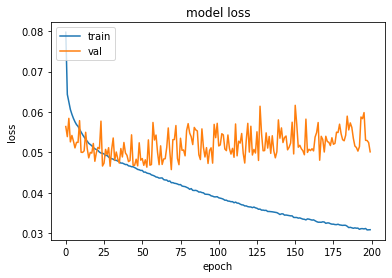

In [8]:
##################
# REPORTS
##################

reports.plotHistory( hist )

In [9]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Black image found
Black image found
Images count =5000
Best RMSENZ  =4565 (0.91)
Best MAENZ   =4609 (0.92)
Best Accuracy=4105 (0.82)
RMSE-NZ  Pred=0.0580  Noisy=0.1566
MAE-NZ   Pred=0.0502  Noisy=0.1486
PSNR     Pred=15.2 dB Noisy=6.9 dB
Accuracy Pred=0.28    Noisy=0.11
SSM      Pred=0.89    Noisy=0.53
HOG MSE  Pred=0.10    Noisy=0.21


Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test/
Noisy files:15
Nitid files:15
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_0_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_0_nitid_idx076.tif


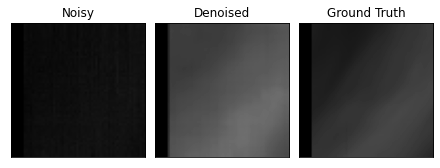

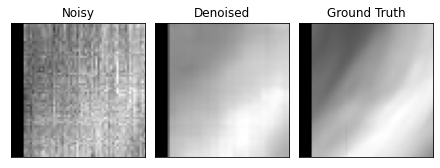

RMSE-NZ  Pred=0.1252  Noisy=0.1435 BEST
MAE-NZ   Pred=0.1179  Noisy=0.1359 BEST
PSNR     Pred=7.0 dB Noisy=5.8 dB BEST
Accuracy Pred=0.10    Noisy=0.00 BEST
SSM      Pred=0.82    Noisy=0.28
HOG MSE  Pred=0.06    Noisy=0.17
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_3_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_3_nitid_idx076.tif


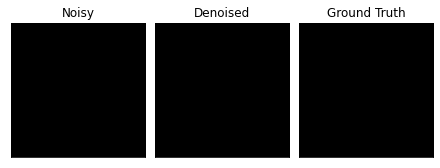

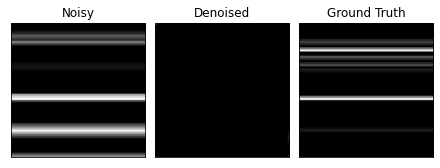

RMSE-NZ  Pred=0.0000  Noisy=0.0000 BEST
MAE-NZ   Pred=0.0000  Noisy=0.0000 BEST
PSNR     Pred=12.8 dB Noisy=10.9 dB BEST
Accuracy Pred=1.00    Noisy=1.00 WORST
SSM      Pred=1.00    Noisy=1.00
HOG MSE  Pred=0.11    Noisy=0.00
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_4_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_4_nitid_idx076.tif


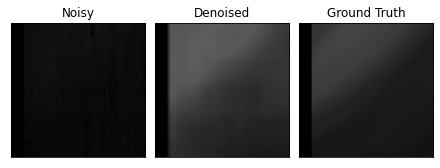

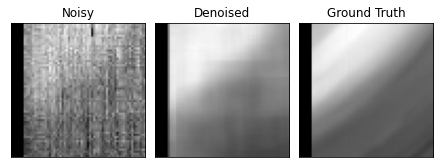

RMSE-NZ  Pred=0.0788  Noisy=0.1196 BEST
MAE-NZ   Pred=0.0712  Noisy=0.1070 BEST
PSNR     Pred=10.9 dB Noisy=7.2 dB BEST
Accuracy Pred=0.10    Noisy=0.00 BEST
SSM      Pred=0.86    Noisy=0.33
HOG MSE  Pred=0.08    Noisy=0.12
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_8_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_8_nitid_idx076.tif


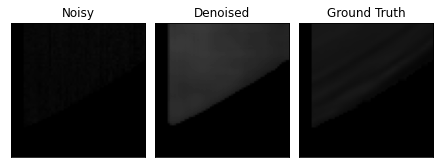

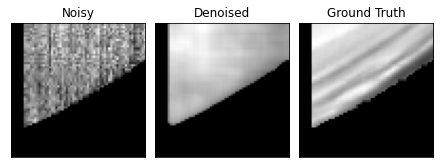

RMSE-NZ  Pred=0.0697  Noisy=0.0426 WORST
MAE-NZ   Pred=0.0479  Noisy=0.0346 WORST
PSNR     Pred=3.2 dB Noisy=7.5 dB WORST
Accuracy Pred=0.50    Noisy=0.29 BEST
SSM      Pred=0.81    Noisy=0.59
HOG MSE  Pred=0.08    Noisy=0.07
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_4_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_4_nitid_idx076.tif


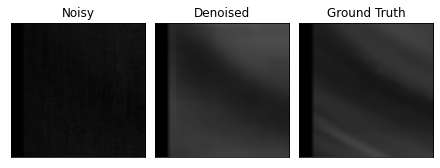

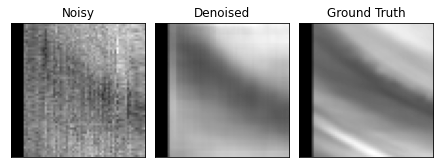

RMSE-NZ  Pred=0.0310  Noisy=0.1179 BEST
MAE-NZ   Pred=0.0237  Noisy=0.1105 BEST
PSNR     Pred=18.9 dB Noisy=7.3 dB BEST
Accuracy Pred=0.29    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.45
HOG MSE  Pred=0.05    Noisy=0.13
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_5_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_5_nitid_idx076.tif


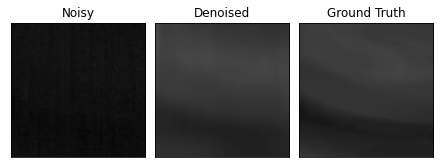

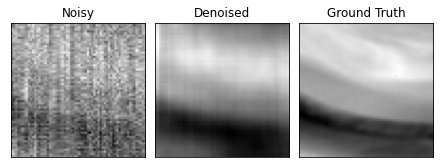

RMSE-NZ  Pred=0.0196  Noisy=0.1383 BEST
MAE-NZ   Pred=0.0157  Noisy=0.1327 BEST
PSNR     Pred=22.7 dB Noisy=5.8 dB BEST
Accuracy Pred=0.37    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.52
HOG MSE  Pred=0.07    Noisy=0.41
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_8_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_8_nitid_idx076.tif


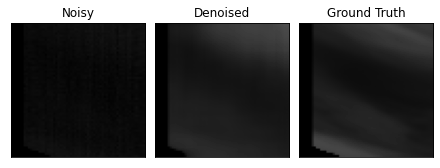

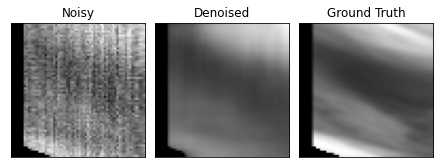

RMSE-NZ  Pred=0.0263  Noisy=0.0976 BEST
MAE-NZ   Pred=0.0167  Noisy=0.0842 BEST
PSNR     Pred=20.4 dB Noisy=9.1 dB BEST
Accuracy Pred=0.42    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.56
HOG MSE  Pred=0.08    Noisy=0.23
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0073_03_00_15_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0073_03_00_15_nitid_idx076.tif


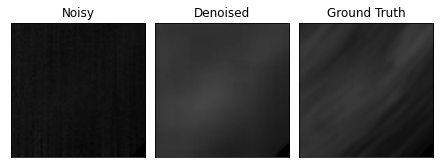

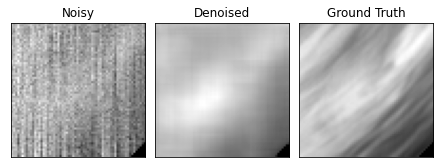

RMSE-NZ  Pred=0.0364  Noisy=0.1050 BEST
MAE-NZ   Pred=0.0322  Noisy=0.0981 BEST
PSNR     Pred=16.7 dB Noisy=7.5 dB BEST
Accuracy Pred=0.14    Noisy=0.02 BEST
SSM      Pred=0.89    Noisy=0.55
HOG MSE  Pred=0.10    Noisy=0.28
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_00_00_0_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_00_00_0_nitid_idx076.tif


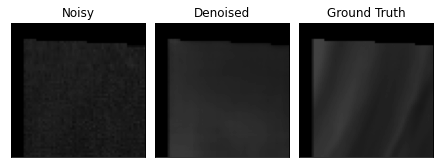

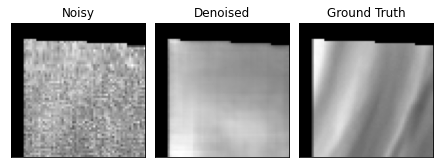

RMSE-NZ  Pred=0.0316  Noisy=0.0621 BEST
MAE-NZ   Pred=0.0229  Noisy=0.0529 BEST
PSNR     Pred=18.4 dB Noisy=12.5 dB BEST
Accuracy Pred=0.38    Noisy=0.08 BEST
SSM      Pred=0.87    Noisy=0.83
HOG MSE  Pred=0.15    Noisy=0.15
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_03_00_11_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_03_00_11_nitid_idx076.tif


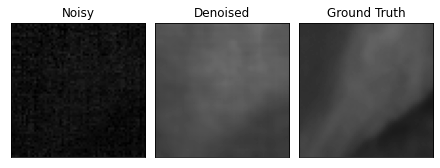

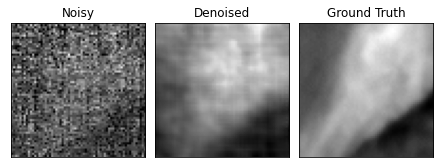

RMSE-NZ  Pred=0.0739  Noisy=0.2089 BEST
MAE-NZ   Pred=0.0637  Noisy=0.1976 BEST
PSNR     Pred=14.8 dB Noisy=5.8 dB BEST
Accuracy Pred=0.05    Noisy=0.00 BEST
SSM      Pred=0.82    Noisy=0.23
HOG MSE  Pred=0.11    Noisy=0.23
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_03_01_10_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_03_01_10_nitid_idx076.tif


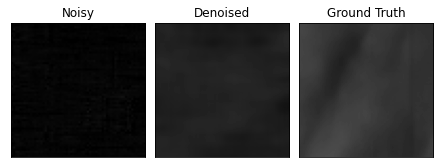

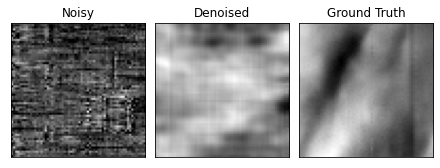

RMSE-NZ  Pred=0.0886  Noisy=0.1921 BEST
MAE-NZ   Pred=0.0834  Noisy=0.1894 BEST
PSNR     Pred=10.5 dB Noisy=3.7 dB BEST
Accuracy Pred=0.01    Noisy=0.00 BEST
SSM      Pred=0.77    Noisy=0.28
HOG MSE  Pred=0.18    Noisy=0.25
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_03_01_3_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_03_01_3_nitid_idx076.tif


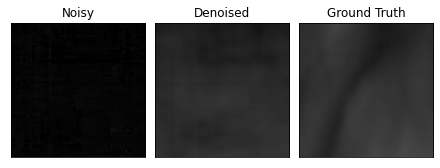

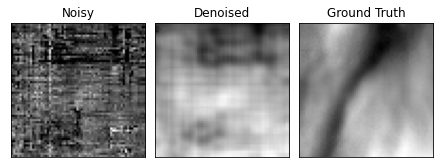

RMSE-NZ  Pred=0.0458  Noisy=0.1794 BEST
MAE-NZ   Pred=0.0389  Noisy=0.1760 BEST
PSNR     Pred=15.7 dB Noisy=3.8 dB BEST
Accuracy Pred=0.10    Noisy=0.00 BEST
SSM      Pred=0.86    Noisy=0.22
HOG MSE  Pred=0.10    Noisy=0.24
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_03_01_9_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_03_01_9_nitid_idx076.tif


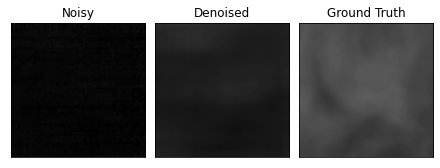

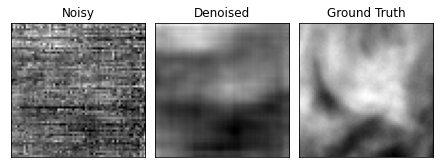

RMSE-NZ  Pred=0.1783  Noisy=0.2648 BEST
MAE-NZ   Pred=0.1752  Noisy=0.2625 BEST
PSNR     Pred=6.2 dB Noisy=2.7 dB BEST
Accuracy Pred=0.00    Noisy=0.00 WORST
SSM      Pred=0.58    Noisy=0.40
HOG MSE  Pred=0.13    Noisy=0.16
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0261_04_00_8_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0261_04_00_8_nitid_idx076.tif


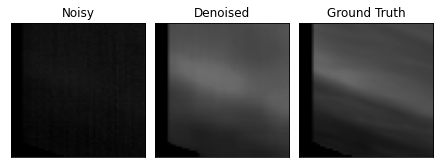

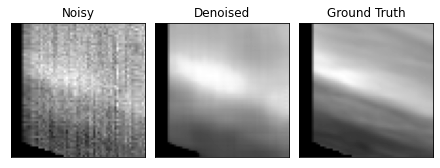

RMSE-NZ  Pred=0.0409  Noisy=0.1889 BEST
MAE-NZ   Pred=0.0347  Noisy=0.1739 BEST
PSNR     Pred=20.1 dB Noisy=6.8 dB BEST
Accuracy Pred=0.16    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.37
HOG MSE  Pred=0.05    Noisy=0.15
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0261_04_01_9_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0261_04_01_9_nitid_idx076.tif


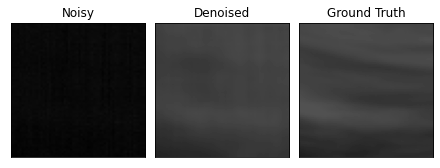

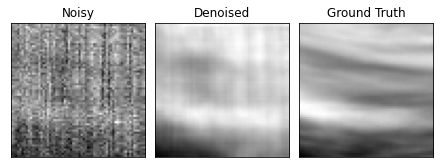

RMSE-NZ  Pred=0.0249  Noisy=0.2131 BEST
MAE-NZ   Pred=0.0202  Noisy=0.2098 BEST
PSNR     Pred=22.3 dB Noisy=3.6 dB BEST
Accuracy Pred=0.30    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.25
HOG MSE  Pred=0.16    Noisy=0.45
******************************************************


In [10]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
test_noisy, test_nitid = dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )

In [11]:
model.save(os.path.abspath(os.path.join('../../../saves/', SAVED_MODEL)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-unet-n2\assets
